In [2]:
from pyspark import SparkContext, SparkConf
from scipy.io import loadmat
import numpy as np
from pyspark.sql.types import Row
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier, RandomForestClassificationModel
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql import SQLContext
from pyspark.ml.linalg import Vectors
import os
import time
from sklearn.metrics import roc_curve, auc
from pyspark.ml import Pipeline
import gcsfs
import json




    

num_nodes = 2
appName = 'seizure_detection'
conf = SparkConf().setAppName(appName).setMaster('local')
conf = (conf.setMaster('local[*]')
        .set("spark.executor.instances", str(2 * num_nodes))
        .set('spark.executor.memory', '15G')
        .set('spark.driver.memory', '15G')
        .set('spark.driver.maxResultSize', '15G'))
try:
    sc.stop()
except:
    pass
sc = SparkContext(conf = conf)

sqlContext = SQLContext(sc)
    
gs_dir = "gs://seizure_detection_data/notebooks/seizure_detection_spark_gcp"
json_str_rdd = sc.textFile(gs_dir + '/SETTINGS.json')
json_str = ''.join(json_str_rdd.collect())
settings = json.loads(json_str)

proj_name = settings['gcp-project-name']
proj_dir = settings['gcp-bucket-project-dir']

fs = gcsfs.GCSFileSystem(project=proj_name)
fopen = fs.open(proj_dir + '/spark_data_io.py')
exec(fopen.read())
fopen.close()
fopen = fs.open(proj_dir + '/spark_transform.py')
exec(fopen.read())
fopen.close()
fopen = fs.open(proj_dir + '/spark_processing.py')
exec(fopen.read())
fopen.close()


trained_models = train_model(gs_dir, ['Patient_8'], sc, fs, num_nodes)
loaded_model = load_model(gs_dir, 'Patient_8')
loaded_model





--- Patient_8: Data Loading 384.00960326194763 seconds ---
1890
--- Patient_8: Data Transformation 25.397717475891113 seconds ---
--- Patient_8: Model Training 372.35589838027954 seconds ---
--- Patient_8: Saving Trained Model ---
Trained classifier saved
Trained classifier loaded


RandomForestClassificationModel (uid=RandomForestClassifier_4cc288e960d73feec692) with 3000 trees

Patient_8: ---Data Loading 334.98280692100525 seconds ---


KeyboardInterrupt: 

In [ ]:

labeled_df.rdd.count()


In [ ]:
start_ts = time.time()
#rf = RandomForestClassifier(numTrees = 3000, minInstancesPerNode = 2, labelCol = "labels", maxDepth = 4)
rf = set_model(3000, 'labels', maxDepth = 4, seed = 130)
model = rf.fit(labeled_df)
end_ts = time.time()
print("---Model Training %s seconds ---" % (end_ts - start_ts))

Exception ignored in: <function JavaObject.__init__.<locals>.<lambda> at 0x7fcac4558a60>
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1293, in <lambda>
  File "/usr/lib/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 625, in _garbage_collect_object
  File "/usr/lib/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 920, in garbage_collect_object
  File "/usr/lib/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 985, in send_command
  File "/usr/lib/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1152, in send_command
  File "/opt/conda/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt: 
Exception ignored in: <function JavaObject.__init__.<locals>.<lambda> at 0x7fcac4558ae8>
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1293, in <lamb

KeyboardInterrupt: 

In [7]:
#Train and save model
start_time = time.time()
model = model.fit(labeled_df)
end_time = time.time()
print("---Model Training %s seconds ---" % (end_time - start_time))
save_model(model, gs_dir, subject)



KeyboardInterrupt: 

In [4]:
model.fit(labeled_df)

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 41782)
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1159, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 985, in send_command
    response = connection.send_command(command)
  File "/usr/lib/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1164, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving


Py4JError: An error occurred while calling o120.fit

Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/conda/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/opt/conda/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/opt/conda/lib/python3.6/socketserver.py", line 696, in __init__
    self.handle()
  File "/usr/lib/spark/python/pyspark/accumulators.py", line 270, in handle
    poll(accum_updates)
  File "/usr/lib/spark/python/pyspark/accumulators.py", line 242, in poll
    if func():
  File "/usr/lib/spark/python/pyspark/accumulators.py", line 246, in accum_updates
    num_updates = read_int(self.rfile)
  File "/usr/lib/spark/python/pyspark/serializers.py", line 692, in read_int
    raise EOFError
EOFError
----------------------------------------


In [2]:

# def load_model(gs_dir, subject):
#     json_str_rdd = sc.textFile(gs_dir + '/SETTINGS.json')
#     json_str = ''.join(json_str_rdd.collect())
#     settings = json.loads(json_str)
#     model_dir = settings['data-cache-dir']
#     model = RandomForestClassifier.load('/'.join([gs_dir, model_dir, subject + '_rf']))
#     print('Trained classifier loaded')
    
#     return model
# loaded_model = load_model(gs_dir, 'Patient_8')
# loaded_model

Trained classifier loaded


RandomForestClassifier_4221b9cd180ef621e565

In [32]:
#os.chdir('gs://seizure_detection_data/notebooks/seizure_detection_spark_gcp/')
#run fopen
#%run spark_transform.py

In [35]:
# fileobj = fs.open('seizure_detection_data/notebooks/seizure_detection_spark_gcp/seizure-data/Patient_8')

KeyboardInterrupt: 

+--------------------+------+
|            features|labels|
+--------------------+------+
|[0.14803999036411...|   2.0|
|[0.45273005765429...|   2.0|
|[-0.0833379999154...|   2.0|
|[-0.0364386949648...|   2.0|
|[-0.0204796111054...|   2.0|
|[-0.0687967524208...|   2.0|
|[0.03343797624782...|   2.0|
|[-0.0916696034322...|   2.0|
|[-0.1061334774515...|   2.0|
|[-0.0293754394885...|   1.0|
|[-0.1166079730191...|   1.0|
|[-0.0567859256151...|   1.0|
|[0.24963387456687...|   2.0|
|[-0.0522318102167...|   1.0|
|[-0.1412156179137...|   1.0|
|[-0.0934055684441...|   1.0|
|[-0.1665264916954...|   1.0|
|[-0.0349340457554...|   1.0|
|[-0.1295326666505...|   1.0|
|[-0.0880340946598...|   1.0|
+--------------------+------+
only showing top 20 rows



StructType(List(StructField(features,VectorUDT,true),StructField(labels,DoubleType,true)))

375
399
374
384
358


In [13]:
def evaluateClassifer(result):
    result_label = result.select(['prediction', 'labels']).rdd
    metrics = MulticlassMetrics(result_label)
    precision = metrics.weightedPrecision
    recall = metrics.weightedRecall
    f1Score = metrics.weightedFMeasure()
    accu = metrics.accuracy
    print('Accuracy: ' + str(accu))
    print('Average F1 score: ' + str(precision))
    print('Average Precision: ' + str(precision))
    print('Average Recall: ' + str(recall))
    return metrics

def score_classifier_auc(seizure_prob, early_prob, labels):
    S_predictions = seizure_prob
    E_predictions = early_prob
    S_y_cv = [1.0 if (x == 1.0 or x == 2.0) else 0.0 for x in labels]
    E_y_cv = [1.0 if x == 2.0 else 0.0 for x in labels]


    fpr, tpr, thresholds = roc_curve(S_y_cv, S_predictions)
    S_roc_auc = auc(fpr, tpr)
    fpr, tpr, thresholds = roc_curve(E_y_cv, E_predictions)
    E_roc_auc = auc(fpr, tpr)

    return S_roc_auc, E_roc_auc

def customEvaluate(result):
    def resultRddToDf(x):
        '''Convert rdd to  and pass this function in Row() args'''
        d = {}
        d['seizure_prob'] = float(x[0][1] + x[0][2])
        d['early_prob'] = float(x[0][2])
        return d
    result_prob_df = result.select('probability').rdd.map(lambda x: Row(**resultRddToDf(x))).toDF()
    result_prob_df.show()
    seizure_probs = [float(row.seizure_prob) for row in result_prob_df.select('seizure_prob').collect()]
    early_probs = [float(row.early_prob) for row in result_prob_df.select('early_prob').collect()]
    labels = [float(row.labels) for row in result.select('labels').collect()]
    

    S_roc_auc, E_roc_auc = score_classifier_auc(seizure_probs, early_probs, labels)  
    return (S_roc_auc + E_roc_auc) / 2




count = 0
metrics_objs = []
ave_aucs = []
for (training_df, test_df) in cv_iterations:
    rf = RandomForestClassifier(numTrees = 3000, minInstancesPerNode = 2, labelCol = "labels")
    model = rf.fit(training_df)
    result = model.transform(test_df)
    print('Fold '+ str(count) + ':')
    count += 1
    metric = evaluateClassifer(result)
    metrics_objs.append(metric)
    ave_auc = customEvaluate(result)
    print('Average Roc_auc: ' + str(ave_auc))
    ave_aucs.append(ave_auc)

    

    
    
    

    #print('time consumed: ' + str(end_ts - start_ts))
    
    

Fold 0:
Accuracy: 0.9573333333333334
Average F1 score: 0.9480426161188411
Average Precision: 0.9480426161188411
Average Recall: 0.9573333333333335
+--------------------+--------------------+
|          early_prob|        seizure_prob|
+--------------------+--------------------+
|                 0.5|                 0.5|
|                 0.0|                 1.0|
|  0.6666666666666666|                 1.0|
|                 0.0|                 1.0|
|                 0.0|                 1.0|
|0.003018867924528...|0.003018867924528...|
|                 0.0|                 1.0|
|                 0.0|                 1.0|
|                 0.0|                 1.0|
|                 0.0|                 1.0|
|                 0.0|                 1.0|
|                 0.0|                 1.0|
|                 0.0|                 1.0|
|                 0.0|                 1.0|
|                0.25|                0.25|
|                 0.0|                 1.0|
|                

KeyboardInterrupt: 

In [14]:
#(training_df, test_df) = labeled_df.randomSplit([0.7, 0.3], seed = 147)
# (training_df, test_df) = labeled_df.randomSplit([0.7, 0.3])

In [64]:
training_df.show()

+--------------------+------+
|            features|labels|
+--------------------+------+
|[-0.1665264916954...|   1.0|
|[-0.1061334774515...|   2.0|
|[-0.0934055684441...|   1.0|
|[-0.0916696034322...|   2.0|
|[-0.0522318102167...|   1.0|
|[-0.0364386949648...|   2.0|
|[-0.0349340457554...|   1.0|
|[-0.0204796111054...|   2.0|
|[0.03343797624782...|   2.0|
|[0.14803999036411...|   2.0|
|[0.24963387456687...|   2.0|
|[0.45273005765429...|   2.0|
|[-0.5959604666053...|   2.0|
|[-0.1535501899306...|   1.0|
|[-0.1295326666505...|   1.0|
|[-0.1138081595639...|   1.0|
|[-0.0880340946598...|   1.0|
|[-0.0801316647608...|   1.0|
|[-0.0659030403083...|   1.0|
|[-0.0579298952552...|   1.0|
+--------------------+------+
only showing top 20 rows



In [14]:
#rf = RandomForestClassifier(numTrees = 3000, minInstancesPerNode = 2, labelCol = "indexed")
rf = RandomForestClassifier(numTrees = 3000, minInstancesPerNode = 2, labelCol = "labels")
model = rf.fit(training_df)
result = model.transform(test_df)
result.show()

#print('time consumed: ' + str(end_ts - start_ts))

+--------------------+------+--------------------+--------------------+----------+
|            features|labels|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|[-0.1665264916954...|   1.0|[694.056254785105...|[0.23135208492836...|       1.0|
|[0.01194544471794...|   2.0|[523.943037520244...|[0.17464767917341...|       2.0|
|[-0.0422667164140...|   1.0|[273.541190563829...|[0.09118039685460...|       1.0|
|[-0.0199931942944...|   1.0|[613.641314318494...|[0.20454710477283...|       1.0|
|[-0.3119341064526...|   1.0|[528.852547472418...|[0.17628418249080...|       1.0|
|[-0.2907865098831...|   1.0|[198.844897033265...|[0.06628163234442...|       1.0|
|[-0.1140055440021...|   1.0|[577.107732277250...|[0.19236924409241...|       1.0|
|[-0.2324463327947...|   1.0|[403.366397629538...|[0.13445546587651...|       1.0|
|[0.95804384108548...|   2.0|[570.023729439558...|[0.19000790981318...|       2.0|
|[-0

In [20]:
#model.save("gs://seizure_detection_data/notebooks/seizure_detection_spark_gcp/classifier_models/Patient_8_classifier")
end_ts = time.time()
loaded_model = RandomForestClassificationModel.load("gs://seizure_detection_data/notebooks/seizure_detection_spark_gcp/classifier_models/Patient_8_classifier")

In [21]:
result = loaded_model.transform(test_df)
result.show()

+--------------------+------+--------------------+--------------------+----------+
|            features|labels|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|[-0.1665264916954...|   1.0|[694.056254785105...|[0.23135208492836...|       1.0|
|[0.01194544471794...|   2.0|[523.943037520244...|[0.17464767917341...|       2.0|
|[-0.0422667164140...|   1.0|[273.541190563829...|[0.09118039685460...|       1.0|
|[-0.0199931942944...|   1.0|[613.641314318494...|[0.20454710477283...|       1.0|
|[-0.3119341064526...|   1.0|[528.852547472418...|[0.17628418249080...|       1.0|
|[-0.2907865098831...|   1.0|[198.844897033265...|[0.06628163234442...|       1.0|
|[-0.1140055440021...|   1.0|[577.107732277250...|[0.19236924409241...|       1.0|
|[-0.2324463327947...|   1.0|[403.366397629538...|[0.13445546587651...|       1.0|
|[0.95804384108548...|   2.0|[570.023729439558...|[0.19000790981318...|       2.0|
|[-0

In [17]:
metrics = MulticlassMetrics(result_label)
precision = metrics.precision()
recall = metrics.recall()
f1Score = metrics.fMeasure()
accu = metrics.accuracy
print('Accuracy: ' + str(accu))
print('F1 score: ' + str(precision))
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))


Accuracy: 0.9846938775510204
F1 score: 0.9846938775510204
Precision: 0.9846938775510204
Recall: 0.9846938775510204


In [68]:
metrics.confusionMatrix().toArray()

array([[527.,   4.,   0.],
       [  0.,  49.,   0.],
       [  5.,   0.,   3.]])

In [69]:
result.cache()

DataFrame[features: vector, labels: double, rawPrediction: vector, probability: vector, prediction: double]

In [41]:
#result.select('probability').rdd.take(1)

[Row(probability=DenseVector([0.405, 0.505, 0.09]))]

In [18]:
def resultRddToDf(x):
    '''Convert rdd to  and pass this function in Row() args'''
    d = {}
    d['seizure_prob'] = float(x[0][1] + x[0][2])
    d['early_prob'] = float(x[0][2])
    return d
result_prob_df = result.select('probability').rdd.map(lambda x: Row(**resultRddToDf(x))).toDF()
result_prob_df.show()

+--------------------+------------------+
|          early_prob|      seizure_prob|
+--------------------+------------------+
| 0.12740103469455577| 0.620502676558373|
| 0.18260268381479752|0.6343308226304276|
|  0.1338502280577766|0.5104026537874179|
| 0.16496163996674243|0.5294015763670775|
| 0.12387497002532707|0.6428232487976184|
|  0.1479714453693658|0.6047523127231472|
| 0.07912685722731048|0.7987039606488903|
|0.046718092719094675|0.8689450883054228|
|  0.0864730682265012|0.8115908309159795|
| 0.06090104253094534|0.8258457069019318|
| 0.10593420950650412|0.7482111800997264|
|  0.7529051339353698|0.8475300012118763|
| 0.05188092798092909|0.8046009602490078|
|0.017807803981138622|0.9612809896065313|
|0.031272632513918375|0.9182566704237551|
| 0.06006704841114726|0.8016904114434005|
|0.025565061474998728|0.9323739337404212|
| 0.03678165402163089|0.8558008266257267|
| 0.06521126681031045|0.7699292271678945|
| 0.05028051391142852|0.8018449235935394|
+--------------------+------------

In [19]:
seizure_probs = [float(row.seizure_prob) for row in result_prob_df.select('seizure_prob').collect()]
early_probs = [float(row.early_prob) for row in result_prob_df.select('early_prob').collect()]
labels = [float(row.labels) for row in result.select('labels').collect()]

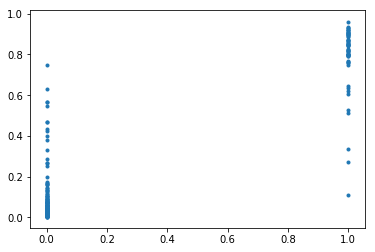

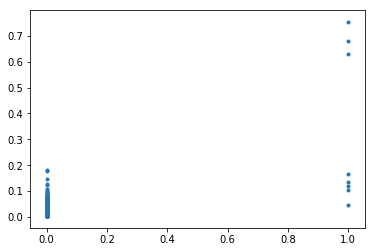

(0.9976542108567086, 0.9857758620689655)

In [82]:
import matplotlib.pyplot as plt


In [46]:
result_prob_df.select('early_prob').collect()

[Row(early_prob=0.0900308669386831),
 Row(early_prob=0.08575861456496732),
 Row(early_prob=0.1058448959146953),
 Row(early_prob=0.12638476865697035),
 Row(early_prob=0.11479890213122144),
 Row(early_prob=0.06384716040836168),
 Row(early_prob=0.05719454334189194),
 Row(early_prob=0.08154460294055353),
 Row(early_prob=0.04228033051867048),
 Row(early_prob=0.0614542731014565),
 Row(early_prob=0.07715631970112011),
 Row(early_prob=0.03181895952165587),
 Row(early_prob=0.04262519176408159),
 Row(early_prob=0.013900828901942481),
 Row(early_prob=0.02205252003702767),
 Row(early_prob=0.036474553810974614),
 Row(early_prob=0.04519253284156974),
 Row(early_prob=0.03133792829253639),
 Row(early_prob=0.04217641504673248),
 Row(early_prob=0.6265590931448219),
 Row(early_prob=0.022201495039094275),
 Row(early_prob=0.02100629643419355),
 Row(early_prob=0.020844987935883245),
 Row(early_prob=0.5819336073061475),
 Row(early_prob=0.03526472539564159),
 Row(early_prob=0.090644996274825),
 Row(early_prob